## Diabetes Dataset Analysis


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Diabetes%20Missing%20Data.csv'
df = pd.read_csv(url)
df.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


Dataset Information

In [ ]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           768 non-null    int64  
 1   Glucose            763 non-null    float64
 2   Diastolic_BP       733 non-null    float64
 3   Skin_Fold          541 non-null    float64
 4   Serum_Insulin      394 non-null    float64
 5   BMI                757 non-null    float64
 6   Diabetes_Pedigree  768 non-null    float64
 7   Age                768 non-null    int64  
 8   Class              768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [ ]:
# Display unique value counts for class columns
class_counts = df['Class'].value_counts()
print("Class Value Counts:")
print(class_counts)


Class Value Counts:
Class
0    500
1    268
Name: count, dtype: int64


### Descriptive Statistics



In [ ]:
df.describe()


,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Task: Identify and Categorize Data Quality Issues
Task: Identify and categorize each data quality issue using the following checklist:
<ol><li>Missing data
<li>Duplicate records
<li>Inconsistent formats
<li>Invalid values
<li>Outliers
<li>Data type issues</ol>
1. Missing Data

Missing values in each column:
 Pregnant               0
Glucose                5
Diastolic_BP          35
Skin_Fold            227
Serum_Insulin        374
BMI                   11
Diabetes_Pedigree      0
Age                    0
Class                  0
dtype: int64


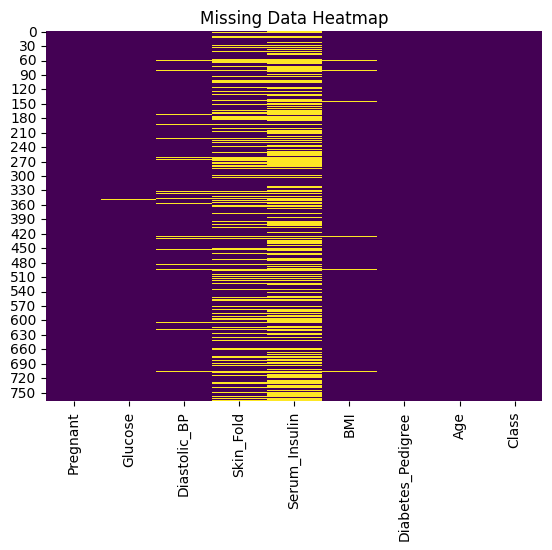

In [ ]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Visualize missing data
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

2. Duplicate Records

In [ ]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate records: {duplicates}")

# If duplicates exist, show them
if duplicates > 0:
    print(df[df.duplicated()])

3. Inconsistent Formats

In [ ]:
# Assuming all columns are numeric, check for any non-numeric values
for col in df.columns:
    print(f"Column {col} unique values: {df[col].unique()[:10]}")  # Show first 10 unique values

# If there are string columns, check for inconsistencies like casing, but here likely none
print("Since all columns appear numeric, no inconsistent string formats expected.")

4. Invalid Values

In [ ]:
# Check for invalid values, e.g., negative values where not possible
invalid_counts = {}
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']:  # Assuming column names
    if col in df.columns:
        invalid = df[df[col] < 0]
        invalid_counts[col] = len(invalid)
        if invalid_counts[col] > 0:
            print(f"Invalid negative values in {col}: {invalid_counts[col]}")

# Check for zero values where invalid (common in this dataset)
zero_invalid_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in zero_invalid_cols:
    if col in df.columns:
        zeros = df[df[col] == 0]
        print(f"Potentially invalid zero values in {col}: {len(zeros)}")

5. Outliers

In [ ]:
# Boxplots for numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

# Using IQR to detect outliers
outliers = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier_count = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
    outliers[col] = outlier_count
print("Outlier counts:\n", outliers)

6. Data Type Issues

In [ ]:
# Check data types
print(df.dtypes)

# Suggest corrections if any, e.g., if a column should be int but is float due to NaNs
print("Data types seem appropriate, but NaNs may cause floats instead of ints.")